In [1]:
# import libraries and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('cookie_cats.csv')

In [2]:
# add mock marketing channels to build more visualizations and showcase my skills
np.random.seed(274352)
marketing_channel_code = pd.Series(np.random.randint(1, 6, data.shape[0]))
marketing_channel_dict = {1: "Facebook", 
                          2: "Instagram", 
                          3: "Push", 
                          4: "Google", 
                          5: "Email"}
data['marketing_channel'] = marketing_channel_code.map(marketing_channel_dict)

In [3]:
# add mock subscription date to build more visualizations and showcase my skills
data['subscribed'] = np.random.randint(1, 16, data.shape[0])
data['subscribed'] = data.apply(lambda x: '2023-11-' + str(x['subscribed']) \
                                if len(str(x['subscribed'])) == 2 \
                                else '2023-11-0' + str(x['subscribed']), axis=1)
data['subscribed'] = pd.to_datetime(data['subscribed'], format='%Y-%m-%d')
data['DoW'] = data['subscribed'].dt.day_of_week + 1
# we will count retention_1 column as subscription
data.rename(columns={'retention_1':'converted'}, inplace=True)
data.head()

,userid,version,sum_gamerounds,converted,retention_7,marketing_channel,subscribed,DoW
0,116,gate_30,3,False,False,Email,2023-11-13,1
1,337,gate_30,38,True,False,Instagram,2023-11-02,4
2,377,gate_40,165,True,False,Google,2023-11-01,3
3,483,gate_40,1,False,False,Push,2023-11-02,4
4,488,gate_40,179,True,True,Facebook,2023-11-08,3


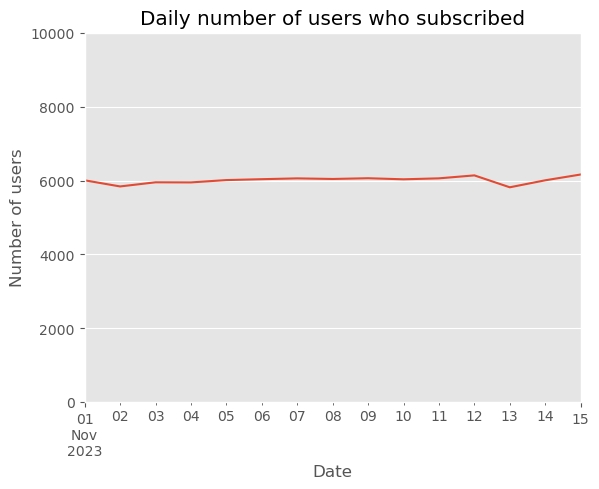

In [4]:
# aggregate unique users that subscribed by date
daily_users = data.groupby('subscribed')['userid'].nunique()
# plot
daily_users.plot()
# annotate 
plt.title('Daily number of users who subscribed')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.ylim(0, 10000)
plt.show()

In [5]:
#split data by game version
gate_30_data = data[data['version'] == 'gate_30']
gate_40_data = data[data['version'] == 'gate_40']

In [6]:
# calculate general conversion rate for both versions
gate_30_converted = gate_30_data[gate_30_data['converted'] == True]['userid'].nunique()
gate_40_converted = gate_40_data[gate_40_data['converted'] == True]['userid'].nunique()

gate_30_total = gate_30_data['userid'].nunique()
gate_40_total = gate_40_data['userid'].nunique()

print(f"Conversion rate for version gate_30 is {round(gate_30_converted / gate_30_total * 100, 2)}%")
print(f"Conversion rate for version gate_40 is {round(gate_40_converted / gate_40_total * 100, 2)}%")

Conversion rate for version gate_30 is 44.82%
Conversion rate for version gate_40 is 44.23%


In [7]:
# calculate general retention rate for both versions
gate_30_retained = gate_30_data[gate_30_data['retention_7'] == True]['userid'].nunique()
gate_40_retained = gate_40_data[gate_40_data['retention_7'] == True]['userid'].nunique()

print(f"Retention rate for version gate_30 is {round(gate_30_retained / gate_30_converted * 100, 2)}%")
print(f"Retention rate for version gate_40 is {round(gate_40_retained / gate_40_converted * 100, 2)}%")

Retention rate for version gate_30 is 42.44%
Retention rate for version gate_40 is 41.15%


In [8]:
# build retention calculation and conversion calculation functions
def conversion_rate(dataframe, column_names):
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['userid'].nunique()
    total = dataframe.groupby(column_names)['userid'].nunique()
    conversion_rate = converted / total
    return conversion_rate
    
def retention_rate(dataframe, column_names):
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['userid'].nunique()
    retained = dataframe[dataframe['retention_7'] == True].groupby(column_names)['userid'].nunique()
    retention_rate = retained / converted
    return retention_rate

In [9]:
# calculate conversion rates and retention rates for every marketing channel
print(f"Conversion rate for version gate_30 by {round(conversion_rate(gate_30_data, ['marketing_channel']) * 100, 2)} \n")
print(f"Conversion rate for version gate_40 by {round(conversion_rate(gate_40_data, ['marketing_channel']) * 100, 2)} \n")

print(f"Retention rate for version gate_30 by {round(retention_rate(gate_30_data, ['marketing_channel']) * 100, 2)} \n")
print(f"Retention rate for version gate_40 by {round(retention_rate(gate_40_data, ['marketing_channel']) * 100, 2)} \n")

Conversion rate for version gate_30 by marketing_channel
Email        45.19
Facebook     45.04
Google       44.32
Instagram    44.33
Push         45.19
Name: userid, dtype: float64 

Conversion rate for version gate_40 by marketing_channel
Email        43.97
Facebook     44.22
Google       44.47
Instagram    45.08
Push         43.38
Name: userid, dtype: float64 

Retention rate for version gate_30 by marketing_channel
Email        42.17
Facebook     41.71
Google       43.00
Instagram    42.31
Push         43.01
Name: userid, dtype: float64 

Retention rate for version gate_40 by marketing_channel
Email        39.93
Facebook     42.29
Google       40.99
Instagram    40.92
Push         41.60
Name: userid, dtype: float64 



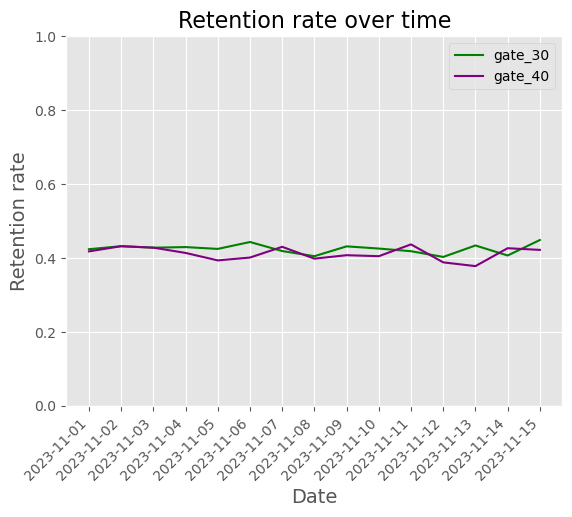

In [10]:
# daily retention over time
total_gate_30_by_date = gate_30_data[gate_30_data['converted'] == True].groupby(['subscribed'])['userid'].nunique()
total_gate_40_by_date = gate_40_data[gate_40_data['converted'] == True].groupby(['subscribed'])['userid'].nunique()

retained_gate_30_by_date = gate_30_data[gate_30_data['retention_7'] == True].groupby(['subscribed'])['userid'].nunique()
retained_gate_40_by_date = gate_40_data[gate_40_data['retention_7'] == True].groupby(['subscribed'])['userid'].nunique()

daily_retention_rate_gate_30 = retention_rate(gate_30_data, ['subscribed'])
daily_retention_rate_gate_40 = retention_rate(gate_40_data, ['subscribed'])

# turn series to dataframes and reset index; then merge dataframes
daily_retention_rate_gate_30 = pd.DataFrame(daily_retention_rate_gate_30.reset_index())
daily_retention_rate_gate_30.columns = ['date_subscribed', 'retention_rate_gate_30']

daily_retention_rate_gate_40 = pd.DataFrame(daily_retention_rate_gate_40.reset_index())
daily_retention_rate_gate_40.columns = ['date_subscribed', 'retention_rate_gate_40']
daily_retention_rate = pd.merge(daily_retention_rate_gate_30,
                                daily_retention_rate_gate_40,
                                how="inner",
                                on='date_subscribed')

#plot individual lines with custom colors and styles
plt.plot(daily_retention_rate['retention_rate_gate_30'], label='gate_30', color='green')
plt.plot(daily_retention_rate['retention_rate_gate_40'], label='gate_40', color='purple')

#add legend
plt.legend()

#add axis labels and a title
plt.xticks(daily_retention_rate.index, [str(x)[:10] for x in daily_retention_rate['date_subscribed'].values])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Retention rate', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Retention rate over time', fontsize=16)
plt.ylim(0, 1)

#display plot
plt.show()

In [11]:
#grouping by channels and subscription date
channels_by_dates_gate_30 = gate_30_data.groupby(['subscribed', 'marketing_channel'])['userid'].count()
channels_by_dates_gate_40 = gate_40_data.groupby(['subscribed', 'marketing_channel'])['userid'].count()

# unstack data after grouping
channels_by_dates_gate_30 = pd.DataFrame(channels_by_dates_gate_30.unstack(level=1))
channels_by_dates_gate_40 = pd.DataFrame(channels_by_dates_gate_40.unstack(level=1))

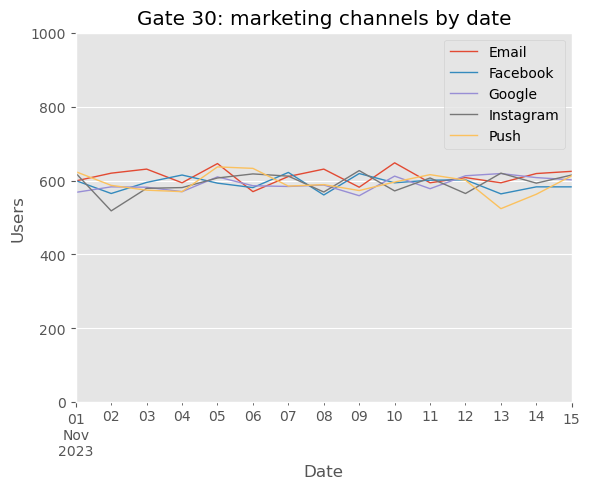

In [12]:
# plot game 30 marketing channels data
channels_by_dates_gate_30.plot(lw=1)
plt.title('Gate 30: marketing channels by date')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc= 'upper right', labels=channels_by_dates_gate_30.columns.values)
plt.ylim(0,1000)
plt.show()

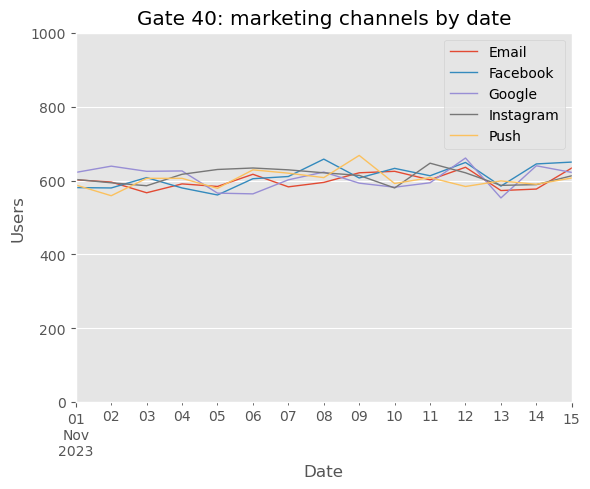

In [13]:
# plot game 40 marketing channels data
channels_by_dates_gate_40.plot(lw=1)
plt.title('Gate 40: marketing channels by date')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc= 'upper right', labels=channels_by_dates_gate_40.columns.values)
plt.ylim(0,1000)
plt.show()

In [14]:
# Retention rate by channel and date
daily_retention_gate_30 = retention_rate(gate_30_data, ['subscribed', 'marketing_channel'])
daily_retention_gate_40 = retention_rate(gate_40_data, ['subscribed', 'marketing_channel'])

daily_retention_gate_30 = pd.DataFrame(daily_retention_gate_30.unstack(level=1))
daily_retention_gate_40 = pd.DataFrame(daily_retention_gate_40.unstack(level=1))

daily_retention_gate_30.head()

marketing_channel,Email,Facebook,Google,Instagram,Push
subscribed,,,,,
2023-11-01,0.394191,0.453925,0.433594,0.403704,0.426573
2023-11-02,0.411972,0.429658,0.472868,0.397490,0.445255
2023-11-03,0.380795,0.380392,0.453782,0.442105,0.488462
2023-11-04,0.440613,0.382456,0.455285,0.485944,0.388889
2023-11-05,0.422078,0.410256,0.422642,0.426415,0.439716


In [15]:
# define the function for plotting columns
def plotting(dataframe):    
    for i, col in enumerate(dataframe.columns):
        df_name = [x for x in globals() if globals()[x] is dataframe][0]
        print(f"Daily retention rate for {col} in {df_name}")
        dataframe[col].plot(fig=plt.figure(i))
        plt.title(col)
        plt.ylabel('Retention rate')
        plt.ylim(0, 1)
        plt.show()

Daily retention rate for Email in daily_retention_gate_30


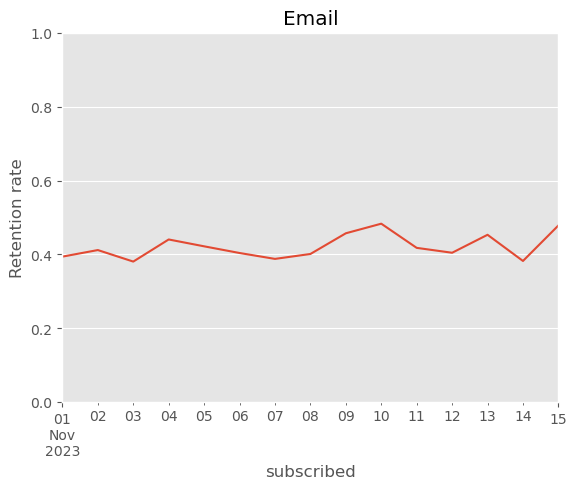

Daily retention rate for Facebook in daily_retention_gate_30


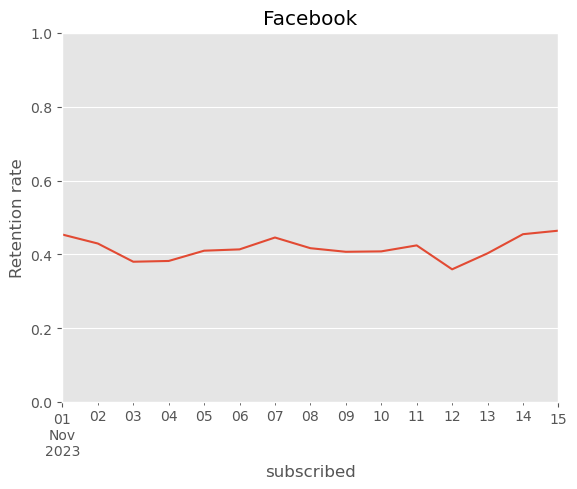

Daily retention rate for Google in daily_retention_gate_30


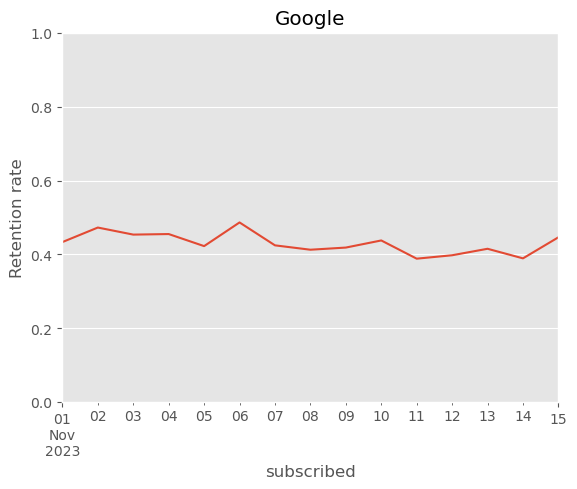

Daily retention rate for Instagram in daily_retention_gate_30


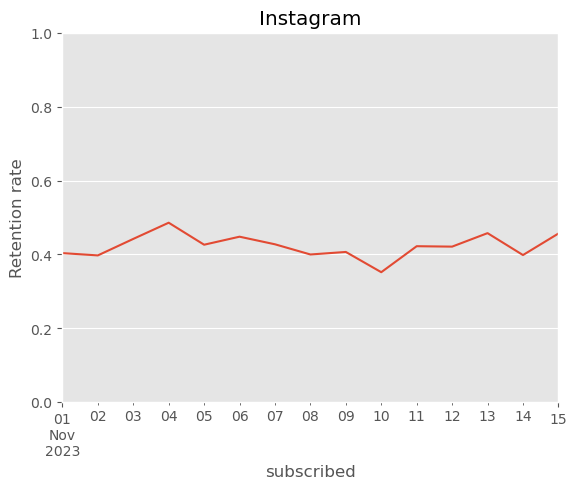

Daily retention rate for Push in daily_retention_gate_30


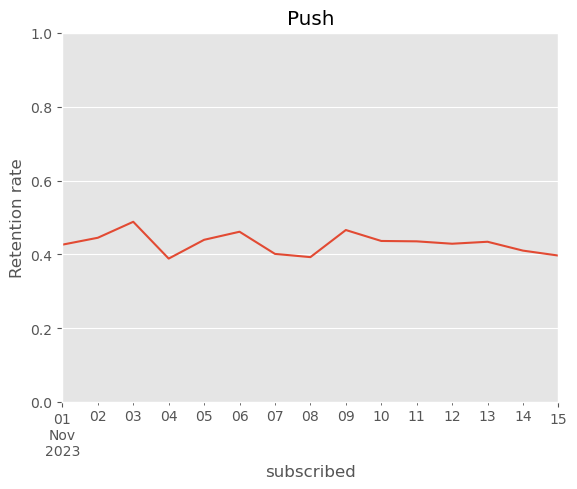

Daily retention rate for Email in daily_retention_gate_40


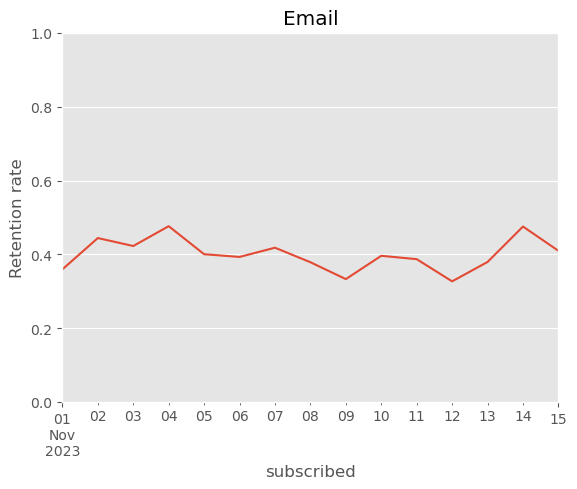

Daily retention rate for Facebook in daily_retention_gate_40


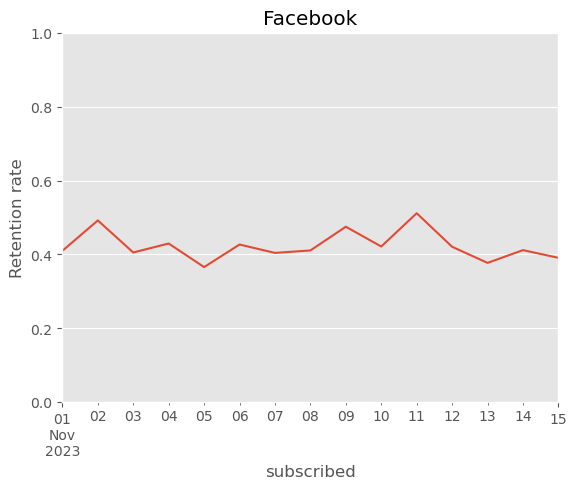

Daily retention rate for Google in daily_retention_gate_40


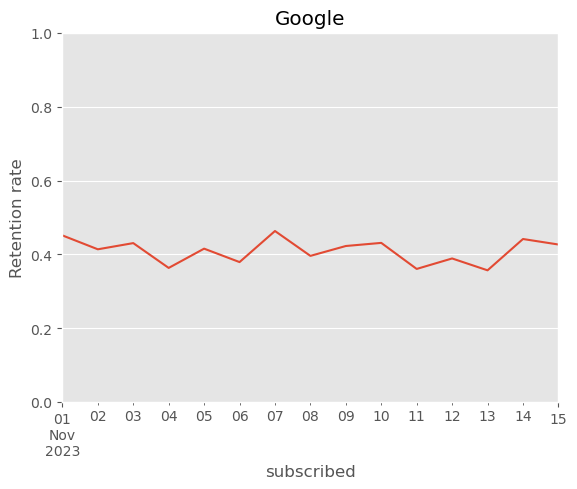

Daily retention rate for Instagram in daily_retention_gate_40


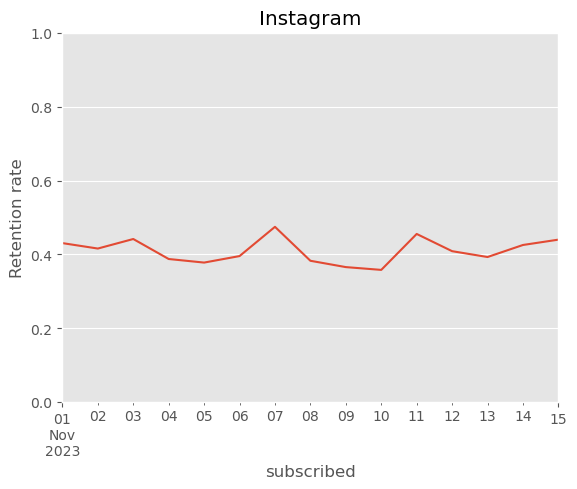

Daily retention rate for Push in daily_retention_gate_40


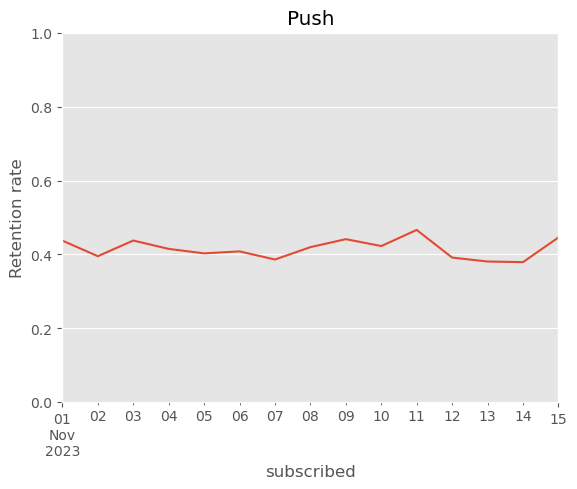

In [16]:
plotting(daily_retention_gate_30)
plotting(daily_retention_gate_40)

In [18]:
# Day of week retention
DoW_retention_gate_30 = retention_rate(gate_30_data, ['DoW'])
DoW_retention_gate_40 = retention_rate(gate_40_data, ['DoW'])

DoW
1    0.438099
2    0.412569
3    0.425262
4    0.431455
5    0.426411
6    0.423543
7    0.413641
Name: userid, dtype: float64

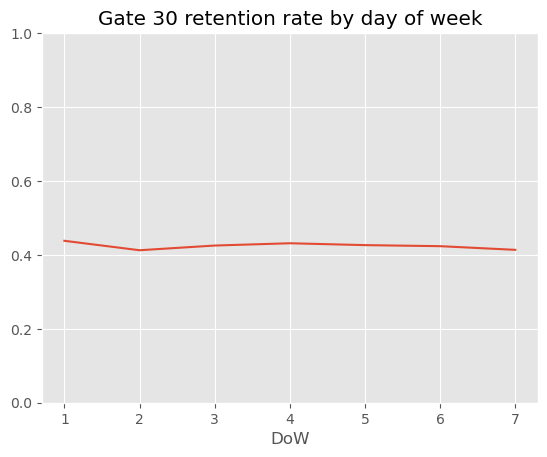

In [19]:
# plotting gate 30 DoW
DoW_retention_gate_30.plot()
plt.title('Gate 30 retention rate by day of week')
plt.ylim(0, 1)
plt.show()

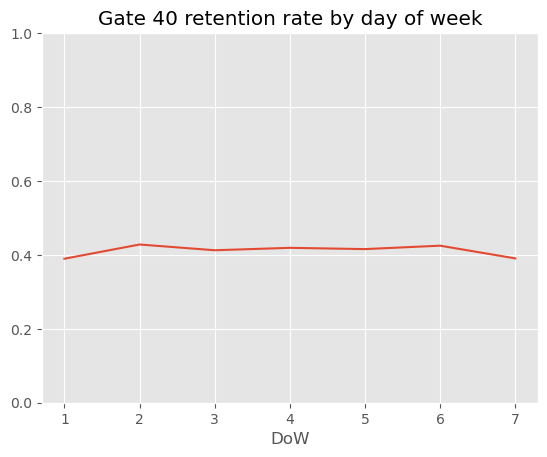

In [20]:
# plotting gate 40 DoW
DoW_retention_gate_40.plot()
plt.title('Gate 40 retention rate by day of week')
plt.ylim(0, 1)
plt.show()

In [24]:
# Calculate index over marketing channels conversion rate agains Push (non paid) for gate 40 version
conversion_channels_gate_40 = conversion_rate(gate_40_data, ['marketing_channel'])
email_index = conversion_channels_gate_40['Email'] / conversion_channels_gate_40['Push']
facebook_index = conversion_channels_gate_40['Facebook'] / conversion_channels_gate_40['Push']
google_index = conversion_channels_gate_40['Google'] / conversion_channels_gate_40['Push']
instagram_index = conversion_channels_gate_40['Instagram'] / conversion_channels_gate_40['Push']

print(f"Email index: {email_index}")
print(f"Facebook index: {facebook_index}")
print(f"Google index: {google_index}")
print(f"Instagram index: {instagram_index}")

Email index: 1.0136603855021107
Facebook index: 1.0192740641374387
Google index: 1.0250615614852818
Instagram index: 1.0392548651002613


In [73]:
# Daily actual conversions
channel_conversions = data.groupby(['subscribed','marketing_channel']).agg({'userid':'nunique', 'converted':'sum'})
expected_conversions = pd.DataFrame(channel_conversions.unstack(level=1))
expected_conversions.head()

userid                                 converted           \
marketing_channel  Email Facebook Google Instagram  Push     Email Facebook   
subscribed                                                                    
2023-11-01          1201     1181   1190      1223  1212       519      554   
2023-11-02          1216     1145   1222      1112  1146       536      517   
2023-11-03          1198     1203   1207      1165  1180       555      514   
2023-11-04          1185     1195   1196      1198  1176       517      534   
2023-11-05          1230     1154   1176      1237  1216       590      519   

                                         
marketing_channel Google Instagram Push  
subscribed                               
2023-11-01           535       530  542  
2023-11-02           543       513  532  
2023-11-03           498       543  509  
2023-11-04           510       543  517  
2023-11-05           544       548  545

In [89]:
# Create push conversion rate column for affected period (first week)
expected_conversions['actual_push_conversions'] = expected_conversions.loc['2023-11-01':'2023-11-07'][('converted'), ('Push')]
expected_conversions

userid                                 converted           \
marketing_channel  Email Facebook Google Instagram  Push     Email Facebook   
subscribed                                                                    
2023-11-01          1201     1181   1190      1223  1212       519      554   
2023-11-02          1216     1145   1222      1112  1146       536      517   
2023-11-03          1198     1203   1207      1165  1180       555      514   
2023-11-04          1185     1195   1196      1198  1176       517      534   
2023-11-05          1230     1154   1176      1237  1216       590      519   
2023-11-06          1187     1186   1150      1252  1262       522      528   
2023-11-07          1194     1233   1186      1241  1205       519      587   
2023-11-08          1226     1219   1211      1190  1197       542      534   
2023-11-09          1203     1226   1152      1241  1241       534      536   
2023-11-10          1273     1227   1194      1152  1188       580      568   
2023-11-11          1196     1214   1172      1254  1224       521      510   
2023-11-12          1244     1251   1274      1186  1185       532      542   
2023-11-13          1167     1149   1172      1207  1123       526      531   
2023-11-14          1196     1228   1248      1182  1153       531      527   
2023-11-15          1259     1233   1224      1228  1220       580      551   

                                        actual_push_conversions  
marketing_channel Google Instagram Push                          
subscribed                                                       
2023-11-01           535       530  542                   542.0  
2023-11-02           543       513  532                   532.0  
2023-11-03           498       543  509                   509.0  
2023-11-04           510       543  517                   517.0  
2023-11-05           544       548  545                   545.0  
2023-11-06           516       519  509                   509.0  
2023-11-07           533       561  518                   518.0  
2023-11-08           529       537  542                     NaN  
2023-11-09           525       550  565                     NaN  
2023-11-10           529       574  514                     NaN  
2023-11-11           531       547  555                     NaN  
2023-11-12           600       545  515                     NaN  
2023-11-13           524       546  496                     NaN  
2023-11-14           525       510  529                     NaN  
2023-11-15           538       513  550                     NaN